# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#cities

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Perform a weather check on each city using a series of successive API calls.
# Include a print log of each city as it's being processed (with the city number and city name).

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

#Define empty lists to store values
cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []

#Looping through cities to make api calls using city as query
i = 1
for city in cities:
    city=city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
#Extracting data. Missing data is handled by try and except  
    try:
        
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        print(f"Processing record {i}|{city}")
        i+=1
    except (KeyError):
        print("City not found. skipping.")

Processing record 1|flinders
Processing record 2|tepecik
Processing record 3|carpentras
Processing record 4|mehamn
Processing record 5|mataura
Processing record 6|hobyo
Processing record 7|bambous virieux
Processing record 8|thinadhoo
City not found. skipping.
City not found. skipping.
Processing record 9|ponta do sol
City not found. skipping.
Processing record 10|yellowknife
Processing record 11|chokurdakh
Processing record 12|yei
Processing record 13|ushuaia
Processing record 14|isangel
Processing record 15|cape town
Processing record 16|srednekolymsk
Processing record 17|vila franca do campo
Processing record 18|sortavala
Processing record 19|kruisfontein
Processing record 20|lebu
Processing record 21|ekibastuz
Processing record 22|phuket
Processing record 23|rikitea
Processing record 24|hamilton
Processing record 25|tasiilaq
City not found. skipping.
City not found. skipping.
Processing record 26|bluff
Processing record 27|puerto ayora
Processing record 28|santa catarina de tepehua

Processing record 248|ola
Processing record 249|rio grande
Processing record 250|marrakesh
Processing record 251|trieste
Processing record 252|redmond
Processing record 253|nangomba
City not found. skipping.
Processing record 254|vao
Processing record 255|heze
Processing record 256|luderitz
Processing record 257|jampur
Processing record 258|san lawrenz
Processing record 259|pekan nenas
Processing record 260|linfen
Processing record 261|carballo
Processing record 262|ormara
Processing record 263|taoudenni
Processing record 264|cochrane
Processing record 265|saint george
Processing record 266|kasongo-lunda
Processing record 267|cabedelo
Processing record 268|svetlogorsk
Processing record 269|tambopata
Processing record 270|betanzos
Processing record 271|makat
Processing record 272|astana
Processing record 273|harper
Processing record 274|souillac
Processing record 275|laguna
Processing record 276|malanje
Processing record 277|la vista
Processing record 278|adrar
City not found. skipping.

Processing record 496|fortuna
Processing record 497|liaocheng
Processing record 498|viedma
Processing record 499|imperia
Processing record 500|lewistown
Processing record 501|thunder bay
Processing record 502|bukama
Processing record 503|mantsala
Processing record 504|neiafu
Processing record 505|karratha
Processing record 506|oranjestad
Processing record 507|port hedland
Processing record 508|hokitika
Processing record 509|ginda
Processing record 510|petropavlovsk-kamchatskiy
Processing record 511|chepareria
Processing record 512|mandalgovi
Processing record 513|deputatskiy
Processing record 514|lalibela
Processing record 515|venezuela
Processing record 516|port lincoln
Processing record 517|belyy yar
Processing record 518|ust-omchug
Processing record 519|khasan
Processing record 520|ous
Processing record 521|floriano
Processing record 522|tifton
Processing record 523|jumla
Processing record 524|aksarka
Processing record 525|cortes
Processing record 526|praia
Processing record 527|ser

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:

city_dataframe = pd.DataFrame({
                                "City Name": city_name,
                                "Country": country,
                                "Cloudiness": cloudiness, 
                                "Max Temp": max_temp, 
                                "Wind Speed": wind_speed,
                                "Humidity": humidity,
                                "Lat": lat, 
                                "Lng": lng,
                               })

city_dataframe = city_dataframe.rename_axis("City ID")
city_dataframe.head()

,City Name,Country,Cloudiness,Max Temp,Wind Speed,Humidity,Lat,Lng
City ID,,,,,,,,
0,Flinders,AU,94,51.06,1.01,91,-34.5833,150.8552
1,Tepecik,TR,100,64.69,2.26,68,41.0293,28.5498
2,Arrondissement de Carpentras,FR,7,82.92,2.46,53,44.0833,5.1667
3,Mehamn,NO,0,48.38,6.91,61,71.0357,27.8492
4,Mataura,NZ,100,46.47,0.65,99,-46.1927,168.8643


In [5]:

# Export the city data into a .csv.
city_dataframe.to_csv("city_dataframe.csv")


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:

city_dataframe = pd.read_csv("city_dataframe.csv")
city_dataframe


,City ID,City Name,Country,Cloudiness,Max Temp,Wind Speed,Humidity,Lat,Lng
0,0,Flinders,AU,94,51.06,1.01,91,-34.5833,150.8552
1,1,Tepecik,TR,100,64.69,2.26,68,41.0293,28.5498
2,2,Arrondissement de Carpentras,FR,7,82.92,2.46,53,44.0833,5.1667
3,3,Mehamn,NO,0,48.38,6.91,61,71.0357,27.8492
4,4,Mataura,NZ,100,46.47,0.65,99,-46.1927,168.8643
...,...,...,...,...,...,...,...,...,...
564,564,Panabá,MX,100,75.70,8.95,89,21.2833,-88.2667
565,565,Ruteng,ID,96,60.84,1.30,95,-8.6136,120.4721
566,566,Plouzané,FR,0,71.69,10.36,77,48.3833,-4.6167
567,567,Syas'stroy,RU,59,53.51,4.25,69,60.1367,32.5691


In [7]:

city_dataframe[city_dataframe["Humidity"] <= 100]

,City ID,City Name,Country,Cloudiness,Max Temp,Wind Speed,Humidity,Lat,Lng
0,0,Flinders,AU,94,51.06,1.01,91,-34.5833,150.8552
1,1,Tepecik,TR,100,64.69,2.26,68,41.0293,28.5498
2,2,Arrondissement de Carpentras,FR,7,82.92,2.46,53,44.0833,5.1667
3,3,Mehamn,NO,0,48.38,6.91,61,71.0357,27.8492
4,4,Mataura,NZ,100,46.47,0.65,99,-46.1927,168.8643
...,...,...,...,...,...,...,...,...,...
564,564,Panabá,MX,100,75.70,8.95,89,21.2833,-88.2667
565,565,Ruteng,ID,96,60.84,1.30,95,-8.6136,120.4721
566,566,Plouzané,FR,0,71.69,10.36,77,48.3833,-4.6167
567,567,Syas'stroy,RU,59,53.51,4.25,69,60.1367,32.5691


In [8]:
# no cities with > 100%
city_dataframe_greater_than_100 = city_dataframe.query("Humidity >  100")
city_dataframe_greater_than_100

# there are no cities that appear in the data frame, this is because there are no cities in the data frame with > 100% humidity

,City ID,City Name,Country,Cloudiness,Max Temp,Wind Speed,Humidity,Lat,Lng


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

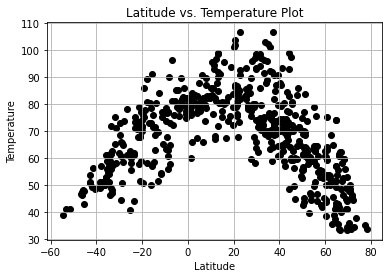

<Figure size 432x288 with 0 Axes>

In [9]:
plt.scatter(city_dataframe["Lat"], city_dataframe["Max Temp"], marker = "o", color = "black", edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitude vs. Temperature Plot")
plt.show()
plt.savefig("Lat_Temp.png")


## Latitude vs. Humidity Plot

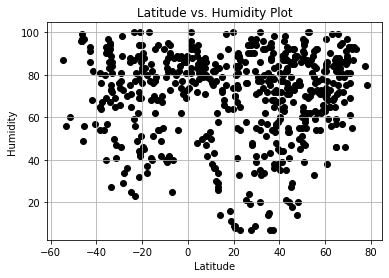

<Figure size 432x288 with 0 Axes>

In [10]:
plt.scatter(city_dataframe["Lat"], city_dataframe["Humidity"], marker = "o", color = "black", edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity Plot")
plt.show()
plt.savefig("Lat_Humidity.png")

## Latitude vs. Cloudiness Plot

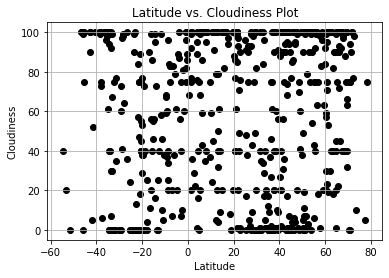

<Figure size 432x288 with 0 Axes>

In [11]:
plt.scatter(city_dataframe["Lat"], city_dataframe["Cloudiness"], marker = "o", color = "black", edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness Plot")
plt.show()
plt.savefig("Lat_CLoudiness.png")

## Latitude vs. Wind Speed Plot

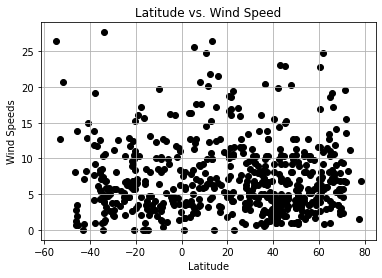

<Figure size 432x288 with 0 Axes>

In [12]:
plt.scatter(city_dataframe["Lat"], city_dataframe["Wind Speed"], marker = "o", color = "black", edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speeds")
plt.title("Latitude vs. Wind Speed")
plt.show()
plt.savefig("Lat_Wind.png")

## Linear Regression

In [13]:
def linear_reg_plot(x_values,y_values, textcoords):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,textcoords,fontsize=20,color="red",)
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.7263214817145343


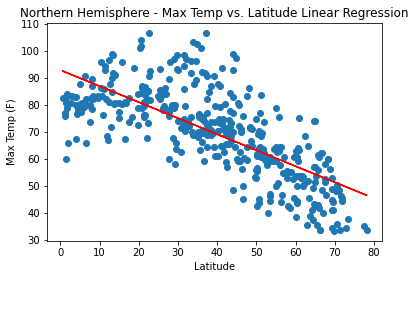

<Figure size 432x288 with 0 Axes>

In [14]:
northern_hemisphere = city_dataframe.loc[city_dataframe["Lat"] > 0]
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
linear_reg_plot(x_values,y_values, (0,0))
plt.savefig("N_Hemisphere_Max_Temp_Lat_Lin_Regression.png")



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7561062765563306


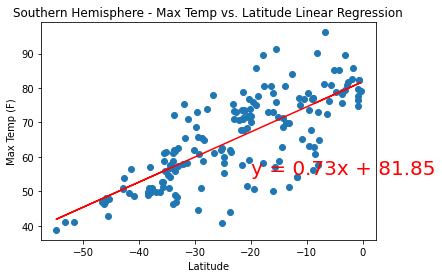

<Figure size 432x288 with 0 Axes>

In [15]:
Southern_hemisphere = city_dataframe.loc[city_dataframe["Lat"]<0]
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
linear_reg_plot(x_values,y_values, (-20, 55))
plt.savefig("S_Hemisphere_Max_Temp_Lat_Lin_Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.11323966159677877


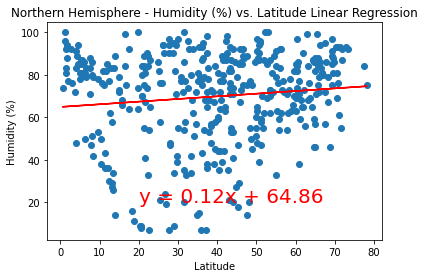

<Figure size 432x288 with 0 Axes>

In [17]:

x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
linear_reg_plot(x_values,y_values, (20,20))
plt.savefig("N_Hesiphere_Humidity_Lat_Lin_Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.054361182952385734


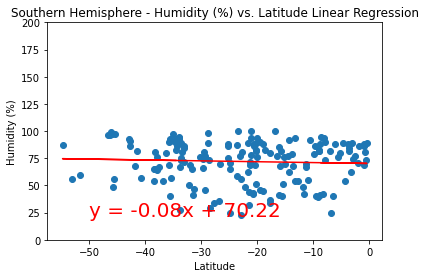

<Figure size 432x288 with 0 Axes>

In [25]:

x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Humidity"]
plt.ylim(0, y_values.max()+100)
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
linear_reg_plot(x_values,y_values, (-50,22))
plt.savefig("S_Hesiphere_Humidity_Lat_Lin_Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.032121345026308104


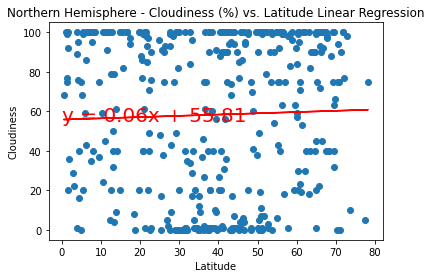

<Figure size 432x288 with 0 Axes>

In [20]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
linear_reg_plot(x_values,y_values, (0,55))
plt.savefig("N_Hesiphere_Cloudiness_Lat_Lin_Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.032121345026308104


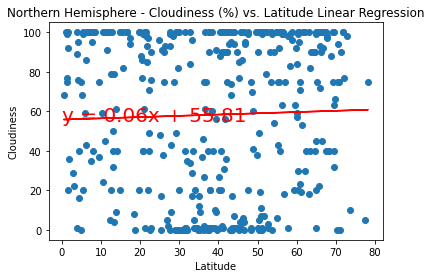

<Figure size 432x288 with 0 Axes>

In [22]:

x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
linear_reg_plot(x_values,y_values, (0,55))
plt.savefig("N_Hesiphere_Cloudiness_Lat_Lin_Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.05947303585683973


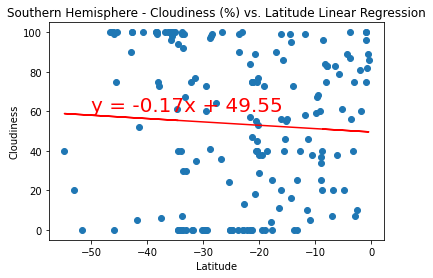

<Figure size 432x288 with 0 Axes>

In [23]:

x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
linear_reg_plot(x_values,y_values, (-50,60))
plt.savefig("S_Hesiphere_Cloudiness_Lat_Lin_Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.0772388114965782


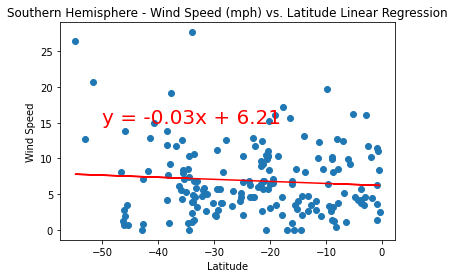

<Figure size 432x288 with 0 Axes>

In [24]:

x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
linear_reg_plot(x_values,y_values, (-50,15))
plt.savefig("S_Hesiphere_Wind_Lat_Lin_Regression.png")